# Web Mining Final Project
## Dalton J. Francis

How different are the receptions of blockbuster films between professional film critics and general audiences?
A python script implementing an http request module was written with the purpose of scraping the respective review pages for the films. The first three pages of both audience and critic reviews were pulled for analysis. BeautifulSoup was used for parsing the html, and the Natural Language Toolkit handled the language dissection.


The following cell displays all modules, libraries, and additional python code files imported by this notebook for use in code down the line.

In [3]:
import pickle
import requests
from bs4 import BeautifulSoup
import nltk
import numpy
import matplotlib.pyplot as plt
import networkx as nx
from nl import score_sentences
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
##nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('vader_lexicon')


In order for quick and consistent testing, pickle files were utilized for caching a version of the data. The following function was used for scraping the necessary webpages up to a set number of review pages. The html is then parsed into only the displayed text from the review blocks, and added to a list. For metrics purposes (covered later on), all text being pulled will be stored in two lists: one where each review is stored separately, and another where each sentence is stored separately.

In [ ]:
def pullReviews(url):
    tempCritReviews=[]
    tempCritSents=[]
    tempAudiReviews=[]
    tempAudiSents=[]
    for i in range(3):
        r = requests.get(url+'?page='+str(i+1)+'&sort=')
        soup = BeautifulSoup(r.text,'html5lib')
        divs = soup.findAll('div',{"class":"the_review"})
        for rev in divs:
            tempCritReviews.append(rev.text) ##4 pages of reviews, 20 reviews per page
            tempCritSents.extend(sent_tokenize(rev.text))
    for i in range(3):
        r = requests.get(url+'?page='+str(i+1)+'&type=user')
        soup = BeautifulSoup(r.text,'html5lib')
        divs = soup.findAll('div',{"class":"user_review"})
        for rev in divs:
            tempAudiReviews.append(rev.text) 
            tempAudiSents.extend(sent_tokenize(rev.text))
    return tempCritReviews,tempCritSents,tempAudiReviews,tempAudiSents


The commented code shows the process of each url being passed to the pullReviews() function, and being saved into pickle files.
The rest of the code is loading the pickled data into the variables we use throughout the rest of the code.

In [8]:
#criticReviews1,criticSents1,audienceReviews1,audienceSents1=pullReviews('https://www.rottentomatoes.com/m/captain_marvel/reviews/')
#with open('criticReviews1.pkl','wb') as f:
#    pickle.dump(criticReviews1,f)
#with open('criticSents1.pkl','wb') as f:
#    pickle.dump(criticSents1,f)
#with open('audienceReviews1.pkl','wb') as f:
#    pickle.dump(audienceReviews1,f)
#with open('audienceSents1.pkl','wb') as f:
#    pickle.dump(audienceSents1,f)

#criticReviews2,criticSents2,audienceReviews2,audienceSents2=pullReviews('https://www.rottentomatoes.com/m/pet_sematary_2019/reviews/')
#with open('criticReviews2.pkl','wb') as f:
#    pickle.dump(criticReviews2,f)
#with open('criticSents2.pkl','wb') as f:
#    pickle.dump(criticSents2,f)
#with open('audienceReviews2.pkl','wb') as f:
#    pickle.dump(audienceReviews2,f)
#with open('audienceSents2.pkl','wb') as f:
#    pickle.dump(audienceSents2,f)

#criticReviews,criticSents,audienceReviews,audienceSents=pullReviews('https://www.rottentomatoes.com/m/us_2019/reviews/')
#with open('criticReviews.pkl','wb') as f:
#    pickle.dump(criticReviews,f)
#with open('criticSents.pkl','wb') as f:
#    pickle.dump(criticSents,f)
#with open('audienceReviews.pkl','wb') as f:
#    pickle.dump(audienceReviews,f)
#with open('audienceSents.pkl','wb') as f:
#    pickle.dump(audienceSents,f)

with open('criticReviews.pkl','rb') as f:
    criticReviews = pickle.load(f)
with open('criticSents.pkl','rb') as f:
    criticSents = pickle.load(f)
with open('audienceReviews.pkl','rb') as f:
    audienceReviews = pickle.load(f)
with open('audienceSents.pkl','rb') as f:
    audienceSents = pickle.load(f)

with open('criticReviews1.pkl','rb') as f:
    criticReviews1 = pickle.load(f)
with open('criticSents1.pkl','rb') as f:
    criticSents1 = pickle.load(f)
with open('audienceReviews1.pkl','rb') as f:
    audienceReviews1 = pickle.load(f)
with open('audienceSents1.pkl','rb') as f:
    audienceSents1 = pickle.load(f)

with open('criticReviews2.pkl','rb') as f:
    criticReviews2 = pickle.load(f)
with open('criticSents2.pkl','rb') as f:
    criticSents2 = pickle.load(f)
with open('audienceReviews2.pkl','rb') as f:
    audienceReviews2 = pickle.load(f)
with open('audienceSents2.pkl','rb') as f:
    audienceSents2 = pickle.load(f)

One point of focus for this experiment is to provide a better insight into the dicotomy of opinions between the general public and those trained with a mind to critique. The inconsistent rating scores of the critics, however, do not serve well as a comparable metric. Rather than relying on quantified 'scores', this project looks to study the lexicon used by the authors and score them on a spectrum of negative and positive language used.

The reviews are separated into lists depending on majority of sentiment (positive or negative).

The average sentiment across all reviews is also calculated.

In [1]:
def sentimentCheck(reviews):
    analyzer = SentimentIntensityAnalyzer()
    avgPolarity=0
    positiveReviews=[]
    negativeReviews=[]
    for review in reviews:
        if(analyzer.polarity_scores(review)['pos']>analyzer.polarity_scores(review)['neg']):
            positiveReviews.append(review)
            avgPolarity+=analyzer.polarity_scores(review)['compound'] #if review is mostly positive, add positive value
        elif(analyzer.polarity_scores(review)['pos']<analyzer.polarity_scores(review)['neg']):
            negativeReviews.append(review)
            avgPolarity+=analyzer.polarity_scores(review)['compound'] #if review is mostly negative, add the inverse of the negative value

    avgPolarity=avgPolarity/len(reviews) #any review with exact neutral values would just add 0.
    print('pos list: ',len(positiveReviews))
    print('neg list: ',len(negativeReviews))
    print('avg pol: ',avgPolarity)

As an addition, the top 10 most commonly used words used in reviews for each film are found separately for both audience and critic reviews.

pos list:  34
neg list:  22
avg pol:  0.11817833333333333
pos list:  36
neg list:  20
avg pol:  0.21464666666666657
pos list:  44
neg list:  11
avg pol:  0.3991066666666666
pos list:  28
neg list:  30
avg pol:  0.028326666666666674
pos list:  20
neg list:  32
avg pol:  -0.12163833333333332
pos list:  31
neg list:  26
avg pol:  0.059919999999999994


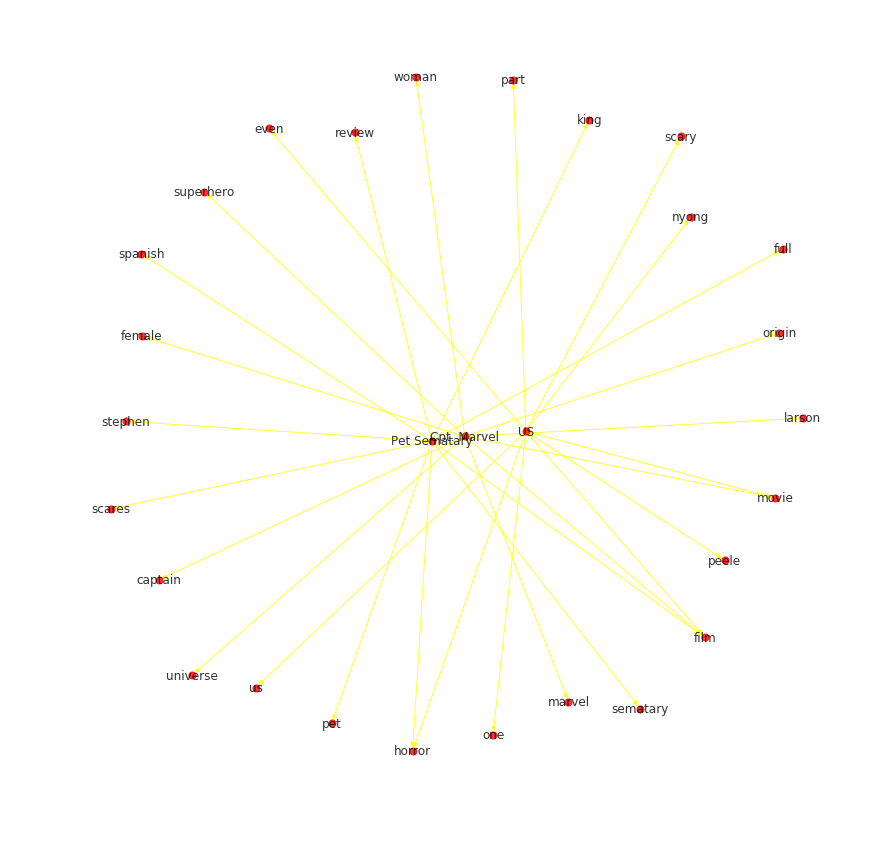

In [9]:
def tf(term,doc):
    tokens = doc.lower().split()
    return tokens.count(term.lower())
    
def vocabCheck(reviews):
    words = list()
    stopwords = set(nltk.corpus.stopwords.words('english'))
    stopwords.add("'s")
    stopwords.add("n't")
    stopwords.add("``")
    stopwords.add("...")
    stopwords.add("''")
    for i in reviews:
        words.extend(map(lambda x: x.lower(),nltk.tokenize.word_tokenize(i)))
    for punctuation in ",.'?''`:;’”“`]['-": #the last three are unicode characters of weird quotes. (python is unicode aware)
        stopwords.add(punctuation) #adds those individual punctuation to the stopwords to be filtered
    freqDist = nltk.FreqDist(words)
    sorted_terms = sorted(freqDist.items(), key=lambda x: x[1], reverse=True)
    tenMostCommon = [word[0] for word in sorted_terms if word[0] not in stopwords][:10]
    return tenMostCommon

def graphCommon(filmNode, graph, important_words):
    for word in important_words:
        graph.add_node(word,type='word')
        graph.add_edge(filmNode,word,type='describes')


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
commonWordsGraph = nx.DiGraph()
for i in range(3):
    if i == 0:
        commonWordsGraph.add_node('US',type='film')
        graphCommon('US',commonWordsGraph,vocabCheck(criticSents))
    if i == 1:
        commonWordsGraph.add_node('Cpt. Marvel',type='film')
        graphCommon('Cpt. Marvel',commonWordsGraph,vocabCheck(criticSents1))
    if i == 2:
        commonWordsGraph.add_node('Pet Sematary',type='film')
        graphCommon('Pet Sematary',commonWordsGraph,vocabCheck(criticSents2))
        
labels = {n:n for n in commonWordsGraph.nodes()}
nx.draw(commonWordsGraph,pos=nx.spring_layout(commonWordsGraph),arrows=True,ax=ax,node_size=50,edge_color='#ffff00',alpha=0.8,labels=labels,fonr_size=8)



sentimentCheck(criticReviews)
sentimentCheck(audienceReviews)
sentimentCheck(criticReviews1)
sentimentCheck(audienceReviews1)
sentimentCheck(criticReviews2)
sentimentCheck(audienceReviews2)
#vocabCheck(criticSents)
#vocabCheck(audienceReviews)
#sentimentCheck(criticReviews)
#sentimentCheck(audienceReviews)

In [18]:
def summarize(sentences, important_words, cthresh=5, top_sentences=3):
    scores = score_sentences(sentences,important_words)
    avg = numpy.mean(scores)
    std_dev = numpy.std(scores)
    score_threshold = avg + 0.5 * std_dev
    mean_scored = [t[0] for t in enumerate(scores) if t[1] > score_threshold]
    sorted_scores = sorted(enumerate(scores),key=lambda x: x[1],reverse=True)[:top_sentences]
    sorted_indices = sorted([s[0] for s in sorted_scores])
    return {' '.join([sentences[i] for i in sorted_indices])} ##,'mean-score': ' '.join([sentences[i] for i in mean_scored])}

print('Us Reviews Summary: ')
print(summarize(criticSents,vocabCheck(criticSents)))
print(summarize(audienceSents,vocabCheck(audienceSents)))
print('Captain Marvel Reviews Summary: ')
print(summarize(criticSents1,vocabCheck(criticSents1)))
print(summarize(audienceSents1,vocabCheck(audienceSents1)))
print('Pet Sematary Reviews Summary: ')
print(summarize(criticSents2,vocabCheck(criticSents2)))
print(summarize(audienceSents2,vocabCheck(audienceSents2)))

Us Reviews Summary: 
{" 'Us' is part horror movie, part social commentary.  Society's demons acquire physical forms while the horror film returns to embrace that politicization that was present in John Carpenter and George A. Romero' best films.  A very significant horror film with a real core, an entertaining story, incredible performances and excellent execution"}
{'  Garbage recycled stuff like get out.not impressed again sorry Peele.   "Us" is an ambitiously intriguing horror film that touches upon complex themes to ponder upon, has sharp direction from Jordan Peele and a remarkable performance from Lupita Nyong\'o.   Us is a amazing and truly scary horror movie.'}
Captain Marvel Reviews Summary: 
{" I have to admit that I admire any superhero movie in which the hero spends at least half of her screen time wearing a faded Nine Inch Nails T-shirt  Captain Marvel's reflection of the female experience, along with the themes of empowerment and the general nostalgia trip, help make the 

According the website’s actual review scores, there is often a wide range of error between the total scores for films rated by unaccredited users compared to movie critics. The scoring system used by each of the critics is up to their own discretion, leaving room for confusion when reading them individually. Through lexical analysis of both pools of reviews, we show that the number of reviews that share mostly-positive sentiments is much closer than even the total ratings are. This removes the ambiguity of the scores given out by untrained reviewers by directly consulting the language they used within their review.